In [1]:
#모듈 import

import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [14]:
#데이터 불러오기
data = []
with open('iris.data', 'r') as f:
  for line in f:
    if line.strip():
      #데이터 형태 5.1,3.5,1.4,0.2,Iris-setosa
      item = line.strip().split(",")
      #item[:-1] -> ['6.0', '2.7', '5.1', '1.6']
      data.append( ([float(val) for val in item[:-1]], item[-1]) )
  
species = {s : i for i, s in enumerate(set(d[1] for d in data))}
data = [(d[0], species[d[1]]) for d in data]


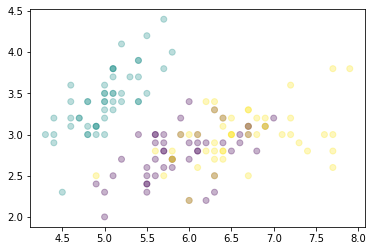

In [15]:
plt.scatter([d[0][0] for d in data],
            [d[0][1] for d in data], c=[d[1] for d in data], alpha=0.3)
plt.show()

In [16]:
#데이터 분리
random.shuffle(data)
train = data[:30]
test = data[-30:]

In [17]:
def distance(a, b):
  s = 0
  for i in range(len(a[0])):
    s += (a[0][i] - b[0][i]) ** 2
  return s ** 0.5

def knn_classify(l, query, train):
  knns = sorted((distance(point, query), point) for point in train)[:k]

  scores = {}
  for dist, point in knns:
    scores[point[1]] = scores.get(point[1], 0) + 1/(1+dist)
  
  resp, score = max(scores.items(), key=lambda x: x[1])

  return resp

In [18]:
#test
k = 3
correct = sum(1 for t in test if knn_classify(k, t, train) == t[1])
accuracy = correct/len(test)
print("accuracy:", accuracy)

accuracy: 1.0


100%|██████████| 100/100 [00:16<00:00,  6.23it/s]


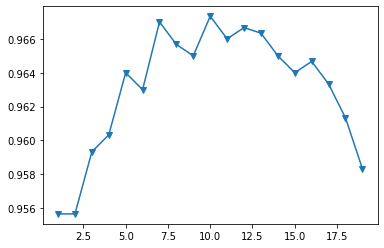

In [20]:
num_trials = 100
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size

corrects = [0]*20

for i in tqdm(range(num_trials)):
  random.shuffle(data)

  train = data[:train_size]
  test = data[train_size:]

  for k in range(1,20):
    corrects[k] += sum(1 for t in test if knn_classify(k,t,train) == t[1])
for k in range(1,20):
  corrects[k] /= num_trials * test_size

plt.plot(range(1,20), corrects[1:], '-v')
plt.show()